Sometimes, we really need to know exactly when something happened. Up until now, the datetime objects we have worked with are what is called "naive", and can't be compared across different parts of the world. They don't know anything about their time zone.

Here, we imoprt datetime, timedelta and timezone

In [1]:
#Import packages
from datetime import datetime, timedelta, timezone

In [2]:
#Creating a Time Zone
ET = timezone(timedelta(hours = -5))

#Timezone-aware datetime
dt = datetime(2017, 12, 30, 15, 9, 3, tzinfo = ET)

In [3]:
print(dt)

2017-12-30 15:09:03-05:00


Making a datetime "aware" of its timezone means we can ask Python new questions. 

In [4]:
#India Standard Timezone
IST = timezone(timedelta(hours = 5, minutes = 30))

#converting dt to IST
print(dt.astimezone(IST))

2017-12-31 01:39:03+05:30


In [5]:
#Adjusting timezone vs changing tzinfo
print(dt)

2017-12-30 15:09:03-05:00


In [6]:
print(dt.replace(tzinfo = timezone.utc))

2017-12-30 15:09:03+00:00


Here, we only change the utc offset but not the clock.

In [7]:
print(dt.astimezone(timezone.utc))

2017-12-30 20:09:03+00:00


But In this case we changed both utc offset and clock.

In [8]:
##Example
# Import datetime, timezone
from datetime import datetime, timezone

# October 1, 2017 at 15:26:26, UTC
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=timezone.utc)

# Print results
print(dt.isoformat())

2017-10-01T15:26:26+00:00


In [9]:
##Example
# Import datetime, timedelta, timezone
from datetime import datetime, timedelta, timezone

# Create a timezone for Pacific Standard Time, or UTC-8
pst = timezone(timedelta(hours=-8))

# October 1, 2017 at 15:26:26, UTC-8
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=pst)

# Print results
print(dt.isoformat())

2017-10-01T15:26:26-08:00


In [10]:
##Example
# Import datetime, timedelta, timezone
from datetime import datetime, timedelta, timezone

# Create a timezone for Australian Eastern Daylight Time, or UTC+11
aedt = timezone(timedelta(hours=11))

# October 1, 2017 at 15:26:26, UTC+11
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=aedt)

# Print results
print(dt.isoformat())

2017-10-01T15:26:26+11:00


###################################################################

### Time Zone Database

There is a database called tz, updated 3-4 times a year as timezone rules change. This database is used by computer programs across many programming languages. Because timezone information changes so quickly, it doesn't make sense to bundle it directly into Python. Instead, we will use a package called dateutil.

In [11]:
#Importing
from datetime import datetime
from dateutil import tz

#Making a timezone object
et= tz.gettz('America/New_York')
#Format : 'Continent/City'

In [12]:
print(type(et))

<class 'dateutil.zoneinfo.tzfile'>


In [13]:
print(et)

tzfile('US/Eastern')


In [14]:
#Last ride
last = datetime(2017, 12, 30, 15, 9, 3, tzinfo = et)
print(last)

2017-12-30 15:09:03-05:00


In [15]:
#First ride
first = datetime(2017, 10, 1, 15, 23, 25, tzinfo = et)
print(first)

2017-10-01 15:23:25-04:00


In [16]:
import pickle

In [17]:
with open("onebike_datetimes", 'rb') as file:
    onebike_datetimes = pickle.load(file)

In [18]:
onebike_datetimes[:10]

[{'start': datetime.datetime(2017, 10, 1, 15, 23, 25),
  'end': datetime.datetime(2017, 10, 1, 15, 26, 26)},
 {'start': datetime.datetime(2017, 10, 1, 15, 42, 57),
  'end': datetime.datetime(2017, 10, 1, 17, 49, 59)},
 {'start': datetime.datetime(2017, 10, 2, 6, 37, 10),
  'end': datetime.datetime(2017, 10, 2, 6, 42, 53)},
 {'start': datetime.datetime(2017, 10, 2, 8, 56, 45),
  'end': datetime.datetime(2017, 10, 2, 9, 18, 3)},
 {'start': datetime.datetime(2017, 10, 2, 18, 23, 48),
  'end': datetime.datetime(2017, 10, 2, 18, 45, 5)},
 {'start': datetime.datetime(2017, 10, 2, 18, 48, 8),
  'end': datetime.datetime(2017, 10, 2, 19, 10, 54)},
 {'start': datetime.datetime(2017, 10, 2, 19, 18, 10),
  'end': datetime.datetime(2017, 10, 2, 19, 31, 45)},
 {'start': datetime.datetime(2017, 10, 2, 19, 37, 32),
  'end': datetime.datetime(2017, 10, 2, 19, 46, 37)},
 {'start': datetime.datetime(2017, 10, 3, 8, 24, 16),
  'end': datetime.datetime(2017, 10, 3, 8, 32, 27)},
 {'start': datetime.datetime

In [19]:
##Example
# Import tz
from dateutil import tz

# Create a timezone object for Eastern Time
et = tz.gettz('America/New_York')

# Loop over trips, updating the datetimes to be in Eastern Time
for trip in onebike_datetimes[:10]:
  # Update trip['start'] and trip['end']
  trip['start'] = trip['start'].replace(tzinfo = et)
  trip['end'] = trip['end'].replace(tzinfo = et)

In [20]:
print(onebike_datetimes[:10])

[{'start': datetime.datetime(2017, 10, 1, 15, 23, 25, tzinfo=tzfile('US/Eastern')), 'end': datetime.datetime(2017, 10, 1, 15, 26, 26, tzinfo=tzfile('US/Eastern'))}, {'start': datetime.datetime(2017, 10, 1, 15, 42, 57, tzinfo=tzfile('US/Eastern')), 'end': datetime.datetime(2017, 10, 1, 17, 49, 59, tzinfo=tzfile('US/Eastern'))}, {'start': datetime.datetime(2017, 10, 2, 6, 37, 10, tzinfo=tzfile('US/Eastern')), 'end': datetime.datetime(2017, 10, 2, 6, 42, 53, tzinfo=tzfile('US/Eastern'))}, {'start': datetime.datetime(2017, 10, 2, 8, 56, 45, tzinfo=tzfile('US/Eastern')), 'end': datetime.datetime(2017, 10, 2, 9, 18, 3, tzinfo=tzfile('US/Eastern'))}, {'start': datetime.datetime(2017, 10, 2, 18, 23, 48, tzinfo=tzfile('US/Eastern')), 'end': datetime.datetime(2017, 10, 2, 18, 45, 5, tzinfo=tzfile('US/Eastern'))}, {'start': datetime.datetime(2017, 10, 2, 18, 48, 8, tzinfo=tzfile('US/Eastern')), 'end': datetime.datetime(2017, 10, 2, 19, 10, 54, tzinfo=tzfile('US/Eastern'))}, {'start': datetime.dat

In [21]:
##Example
# Create the timezone object
uk = tz.gettz('Europe/London')

# Pull out the start of the first trip
local = onebike_datetimes[0]['start']

# What time was it in the UK?
notlocal = local.astimezone(uk)

# Print them out and see the difference
print(local.isoformat())
print(notlocal.isoformat())

2017-10-01T15:23:25-04:00
2017-10-01T20:23:25+01:00


In [22]:
##Example
# Create the timezone object
ist = tz.gettz('Asia/Kolkata')

# Pull out the start of the first trip
local = onebike_datetimes[0]['start']

# What time was it in India?
notlocal = local.astimezone(ist)

# Print them out and see the difference
print(local.isoformat())
print(notlocal.isoformat())

2017-10-01T15:23:25-04:00
2017-10-02T00:53:25+05:30


In [23]:
##Example
# Create the timezone object
sm = tz.gettz('Pacific/Apia')

# Pull out the start of the first trip
local = onebike_datetimes[0]['start']

# What time was it in Samoa?
notlocal = local.astimezone(sm)

# Print them out and see the difference
print(local.isoformat())
print(notlocal.isoformat())

2017-10-01T15:23:25-04:00
2017-10-02T09:23:25+14:00


############################################################################

### Daylight Saving Time

Some places change their clocks twice a year to create longer summer evenings. This practice is called daylight saving time. Dealing with daylight saving time can be one of the most fiendish challenges in dealing with dates and times. 

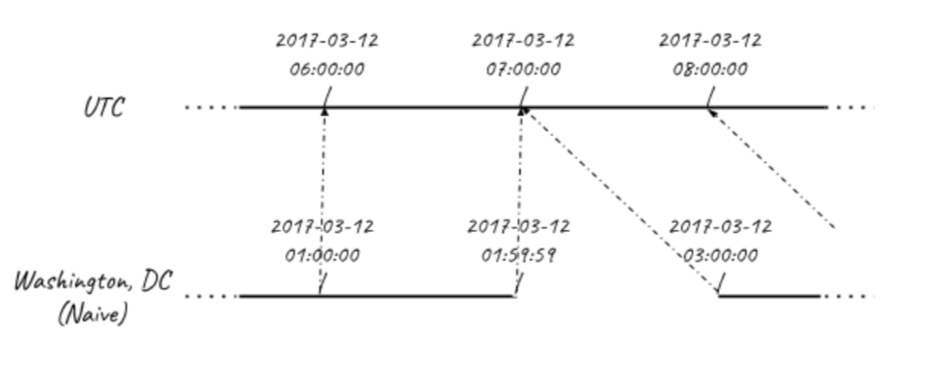

In [24]:
spring_ahead_159am = datetime(2017, 3, 12, 1, 59, 59)
spring_ahead_159am.isoformat()

'2017-03-12T01:59:59'

In [25]:
spring_ahead_3am = datetime(2017, 3, 12, 3, 0, 0)
spring_ahead_3am.isoformat()

'2017-03-12T03:00:00'

In [26]:
(spring_ahead_3am - spring_ahead_159am).total_seconds()

3601.0

In [27]:
#Fixing this problem
from datetime import timezone, timedelta

EST = timezone(timedelta(hours = -5))
EDT = timezone(timedelta(hours = -4))

In [28]:
spring_ahead_159am = spring_ahead_159am.replace(tzinfo = EST)
spring_ahead_159am.isoformat()

'2017-03-12T01:59:59-05:00'

In [29]:
spring_ahead_3am = spring_ahead_3am.replace(tzinfo = EDT)
spring_ahead_3am.isoformat()

'2017-03-12T03:00:00-04:00'

In [30]:
(spring_ahead_3am - spring_ahead_159am).total_seconds()

1.0

Here, daylight savings is considered.

In [31]:
##Example
# Import datetime, timedelta, tz, timezone
from datetime import datetime, timedelta, timezone
from dateutil import tz

# Start on March 12, 2017, midnight, then add 6 hours
start = datetime(2017, 3, 12, tzinfo = tz.gettz('America/New_York'))
end = start + timedelta(hours=6)
print(start.isoformat() + " to " + end.isoformat())

# How many hours have elapsed?
print((end - start).total_seconds()/(60*60))

# What if we move to UTC?
print((end.astimezone(timezone.utc) - start.astimezone(timezone.utc))\
      .total_seconds()/(60*60))

2017-03-12T00:00:00-05:00 to 2017-03-12T06:00:00-04:00
6.0
5.0


In [32]:
##Example
# Import datetime and tz
from datetime import datetime
from dateutil import tz

# Create starting date
dt = datetime(2000, 3, 29, tzinfo = tz.gettz('Europe/London'))

# Loop over the dates, replacing the year, and print the ISO timestamp
for y in range(2000, 2011):
  print(dt.replace(year=y).isoformat())

2000-03-29T00:00:00+01:00
2001-03-29T00:00:00+01:00
2002-03-29T00:00:00+00:00
2003-03-29T00:00:00+00:00
2004-03-29T00:00:00+01:00
2005-03-29T00:00:00+01:00
2006-03-29T00:00:00+01:00
2007-03-29T00:00:00+01:00
2008-03-29T00:00:00+00:00
2009-03-29T00:00:00+00:00
2010-03-29T00:00:00+01:00


######################################################################

### Ending Daylight Saving Time

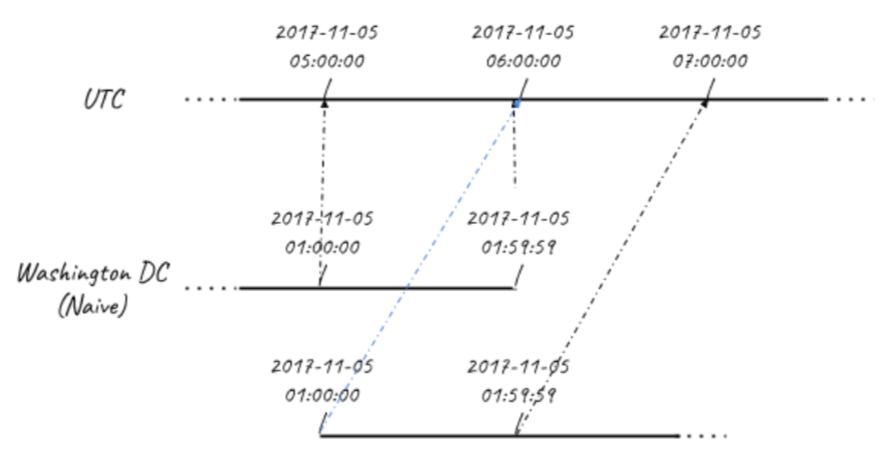